In [1]:
try:
    %load_ext lab_black
except Exception:
    pass

import numpy as np
import pandas as pd
import pywt

import matplotlib.pyplot as plt

%matplotlib inline

from tqdm import trange

In [2]:
train_df = pd.read_csv("./heartbeat/mitbih_train.csv", header=None)
test_df = pd.read_csv("./heartbeat/mitbih_test.csv", header=None)

classes = ["N", "S", "V", "F", "Q"]
sample_len = 187

In [3]:
X_train, y_train = train_df.values[..., :sample_len].T, train_df[sample_len].T
y_train = y_train.astype(int)

pd.value_counts(y_train).rename("Classes distribution")

0    72471
4     6431
2     5788
1     2223
3      641
Name: Classes distribution, dtype: int64

In [4]:
NUM_SAMPLES_IN_MIN_DATASET = 10

Xmin_train = []
ymin_train = []

for c, _ in enumerate(classes):
    (cls_idx,) = np.where(y_train == c)
    min_idx = np.random.choice(cls_idx, NUM_SAMPLES_IN_MIN_DATASET)

    Xmin_train.append(X_train[..., min_idx])
    ymin_train += [c] * NUM_SAMPLES_IN_MIN_DATASET

Xmin_train = np.concatenate(Xmin_train, axis=1)
ymin_train = np.array(ymin_train)

In [5]:
Xmin_prepared_train = []
for i in trange(Xmin_train.shape[1]):
    cwtmatr, freqs = pywt.cwt(X_train[i], np.arange(1, 129), "morl")
    Xmin_prepared_train.append(cwtmatr)

100%|██████████| 50/50 [01:17<00:00,  1.54s/it]


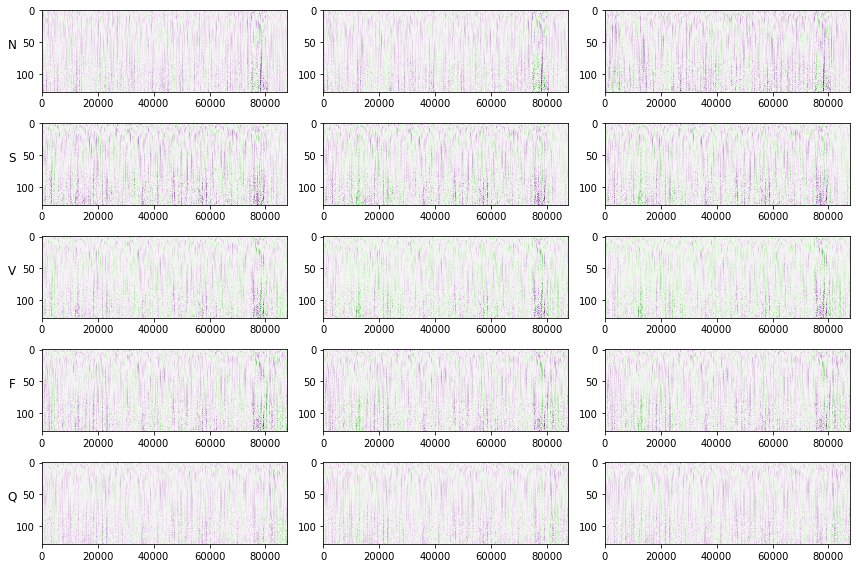

In [41]:
fig, axes = plt.subplots(ncols=3, nrows=len(classes), figsize=(12, 8))

for ax, cls_name in zip(axes[:, 0], classes):
    ax.set_ylabel(cls_name, rotation=0, size="large")

for i, cls in enumerate(classes):
    (idx,) = np.where(ymin_train == i)
    for j in range(3):
        axes[i][j].imshow(Xmin_prepared_train[idx[j]], cmap="PRGn", aspect="auto")

fig.tight_layout()